In [1]:
import re

In [3]:
txt="codebasics: Hello, I am having an issue with my order # 412889912 codebasics: I have a problem with my order number 412889912 codebasics: My order 412889912 is having an issue, I was charged 300$ when online it says 280$"
ptrn="order [^\d]*([\d]*)"
matches=re.findall(ptrn,txt)
matches

['412889912', '412889912', '412889912']

In [20]:
def get_pattern_match(pattern, text):
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]

In [21]:
chat1 = 'codebasics: you ask lot of questions 😠  1235678912, abc@xyz.com'
chat2 = 'codebasics: here it is: (123)-567-8912, abc@xyz.com'
chat3 = 'codebasics: yes, phone: 1235678912 email: abc@xyz.com'
emails="rizzwann1245@gmail123.com bcsm-f18-033@gmail.com"
ptrn = "[a-zA-z0-9]*@[a-zA-z0-9]*\.[a-zA-z0-9]*|[a-zA-z0-9]*-[a-zA-z0-9]*-[a-zA-z0-9]*-*@[a-zA-z0-9]*\.[a-zA-z0-9]*"


In [22]:
get_pattern_match(ptrn,chat1)

'abc@xyz.com'

In [23]:
get_pattern_match(ptrn,chat3)

'abc@xyz.com'

In [24]:
get_pattern_match(ptrn,emails)

'rizzwann1245@gmail123.com'

In [25]:
text='''
Born	Elon Reeve Musk
June 28, 1971 (age 50)
Pretoria, Transvaal, South Africa
Citizenship	
South Africa (1971–present)
Canada (1971–present)
United States (2002–present)
Education	University of Pennsylvania (BS, BA)
Title	
Founder, CEO and Chief Engineer of SpaceX
CEO and product architect of Tesla, Inc.
Founder of The Boring Company and X.com (now part of PayPal)
Co-founder of Neuralink, OpenAI, and Zip2
Spouse(s)	
Justine Wilson
​
​(m. 2000; div. 2008)​
Talulah Riley
​
​(m. 2010; div. 2012)​
​
​(m. 2013; div. 2016)
'''

In [29]:
full_name = get_pattern_match('Born(.*)\n', text)
full_name.strip()

'Elon Reeve Musk'

In [30]:
def extract_personal_information(text):
    age = get_pattern_match('age (\d+)', text)
    full_name = get_pattern_match('Born(.*)\n', text)
    birth_date = get_pattern_match('Born.*\n(.*)\(age', text)
    birth_place = get_pattern_match('\(age.*\n(.*)', text)
    return {
        'age': int(age),
        'name': full_name.strip(),
        'birth_date': birth_date.strip(),
        'birth_place': birth_place.strip()
    }

In [31]:
extract_personal_information(text)

{'age': 50,
 'name': 'Elon Reeve Musk',
 'birth_date': 'June 28, 1971',
 'birth_place': 'Pretoria, Transvaal, South Africa'}

In [32]:
text = '''
Born	Mukesh Dhirubhai Ambani
19 April 1957 (age 64)
Aden, Colony of Aden
(present-day Yemen)[1][2]
Nationality	Indian
Alma mater	
St. Xavier's College, Mumbai
Institute of Chemical Technology (B.E.)
Stanford University (drop-out)
Occupation	Chairman and MD, Reliance Industries
Spouse(s)	Nita Ambani ​(m. 1985)​[3]
Children	3
Parent(s)	
Dhirubhai Ambani (father)
Kokilaben Ambani (mother)
Relatives	Anil Ambani (brother)
Tina Ambani (sister-in-law)
'''

In [33]:
extract_personal_information(text)

{'age': 64,
 'name': 'Mukesh Dhirubhai Ambani',
 'birth_date': '19 April 1957',
 'birth_place': 'Aden, Colony of Aden'}

In [34]:
text = '''
Follow our leader Elon musk on twitter here: https://twitter.com/elonmusk, more information 
on Tesla's products can be found at https://www.tesla.com/. Also here are leading influencers 
for tesla related news,
https://twitter.com/teslarati
https://twitter.com/dummy_tesla
https://twitter.com/dummy_2_tesla
'''
pattern = 'https://twitter\.com/([a-zA-Z0-9_]+)'

re.findall(pattern, text)

['elonmusk', 'teslarati', 'dummy_tesla', 'dummy_2_tesla']

In [35]:
text = '''
Concentration of Risk: Credit Risk
Financial instruments that potentially subject us to a concentration of credit risk consist of cash, cash equivalents, marketable securities,
restricted cash, accounts receivable, convertible note hedges, and interest rate swaps. Our cash balances are primarily invested in money market funds
or on deposit at high credit quality financial institutions in the U.S. These deposits are typically in excess of insured limits. As of September 30, 2021
and December 31, 2020, no entity represented 10% or more of our total accounts receivable balance. The risk of concentration for our convertible note
hedges and interest rate swaps is mitigated by transacting with several highly-rated multinational banks.
Concentration of Risk: Supply Risk
We are dependent on our suppliers, including single source suppliers, and the inability of these suppliers to deliver necessary components of our
products in a timely manner at prices, quality levels and volumes acceptable to us, or our inability to efficiently manage these components from these
suppliers, could have a material adverse effect on our business, prospects, financial condition and operating results.
'''
pattern = 'Concentration of Risk: ([^\n]*)'

re.findall(pattern, text)

['Credit Risk', 'Supply Risk']

In [36]:
text = '''
Tesla's gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion.
BMW's gross cost of operating vehicles in FY2021 S1 was $8 billion.
'''

pattern = 'FY(\d{4} (?:Q[1-4]|S[1-2]))'
matches = re.findall(pattern, text)
matches

['2021 Q1', '2021 S1']

In [ ]:
#pip install nltk

In [ ]:
#pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

In [1]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

In [2]:
for sen in doc.sents:
    print(sen)

When Sebastian Thrun started working on self-driving cars at Google in 2007, few people outside of the company took him seriously.
“I can tell you very senior CEOs of major American car companies would shake my hand and turn away because I wasn’t worth talking to,” said Thrun, in an interview with Recode earlier this week.


In [ ]:
for sen in doc.sents:
    for word in sen:
        print(word)

In [ ]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize

In [11]:
doc=sent_tokenize("Dr. strange loves eat pittza. and i love to eat mom hands coocked food")

In [13]:
doc

['Dr. strange loves eat pittza.', 'and i love to eat mom hands coocked food']

In [34]:
with open("E:/NLP/student.txt") as f:
    text = f.readlines()
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n']

In [35]:
text =" ".join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n'

In [36]:
nlp = spacy.blank('en')

In [37]:
doc = nlp(text)

In [38]:
doc

Dayton high school, 8th grade students information
 
 Name	birth day   	email
 -----	------------	------
 Virat   5 June, 1882    virat@kohli.com
 Maria	12 April, 2001  maria@sharapova.com
 Serena  24 June, 1998   serena@williams.com 
 Joe      1 May, 1997    joe@root.com

In [40]:
for token in doc:
    if token.like_email:
        print(token)

virat@kohli.com
maria@sharapova.com
serena@williams.com
joe@root.com


In [25]:
c=doc[3]
c

a

In [24]:
c.like_email

False

In [41]:
nlp = spacy.blank('ur')

In [51]:
doc = nlp("ہائے، آپ کیسے ہیں ہم 500 PKR جیتتے ہیں۔")
doc

ہائے، آپ کیسے ہیں ہم 500 PKR جیتتے ہیں۔

In [52]:
doc[0]

ہائے

In [53]:
for token in doc:
    print(token,token.is_currency,token.like_num)

ہائے False False
، False False
آپ False False
کیسے False False
ہیں False False
ہم False False
500 False True
PKR False False
جیتتے False False
ہیں False False
۔ False False


In [54]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

In [55]:
nlp = spacy.blank('en')
token=nlp(text)
text

'\nLook for data to help you address the question. Governments are good\nsources because data from public research is often freely available. Good\nplaces to start include http://www.data.gov/, and http://www.science.\ngov/, and in the United Kingdom, http://data.gov.uk/.\nTwo of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, \nand the European Social Survey at http://www.europeansocialsurvey.org/.\n'

In [56]:
for t in token:
    if t.like_url:
        print(t)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


In [57]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

In [59]:
token=nlp(transactions)
token

Tony gave two $ to Peter, Bruce gave 500 € to Steve

In [63]:
for t in token:
    if t.is_currency:
        print(token[t.i-1],t)

two $
500 €


In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
doc = nlp("Captain America ate 100$ samosa. Then he said I can do this all day")
for token in doc:
    print(token,"|",token.pos_,"|",token.lemma_)

Captain | PROPN | Captain
America | PROPN | America
ate | VERB | eat
100 | NUM | 100
$ | SYM | $
samosa | NOUN | samosa
. | PUNCT | .
Then | ADV | then
he | PRON | he
said | VERB | say
I | PRON | I
can | AUX | can
do | VERB | do
this | PRON | this
all | DET | all
day | NOUN | day


###### Lemma
lemma called base words like ate base word is eat

In [4]:
doc =nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent,"|",ent.label_,"|",spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
$45 billion | MONEY | Monetary values, including unit


In [5]:
from spacy import displacy

In [8]:
displacy.render(doc,style='ent')

###### Stemming & lemmitization

###### Stemming 
- eating to eat
- adjustable to adjust
- list of suffix and rule to cut and get base word
- ate to ate could'nt bacuase now use of liguastic knowledge
##### lemmitization
-  It use language rules 
- More accurate

In [9]:
import nltk

In [10]:
from nltk import PorterStemmer
stemmer = PorterStemmer()

In [11]:
words = ['eating','ate','eat','eats','adjustable','rafting','ability','meeting']
for word in words:
    print(word,'|',stemmer.stem(word))

eating | eat
ate | ate
eat | eat
eats | eat
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


In [12]:
nlp = spacy.load("en_core_web_sm")

In [14]:
doc= nlp("eating eat eats ate adjustable rafting ability ")
for token in doc:
    print(token,'|',token.lemma_)

eating | eat
eat | eat
eats | eat
ate | eat
adjustable | adjustable
rafting | raft
ability | ability


In [15]:
doc =nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token,"|",token.lemma_)

Bro | bro
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brah
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


In [16]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [19]:
ar = nlp.get_pipe('attribute_ruler')
ar.add([[{"Text":"Bro"}],[{"Text":"Brah"}]],{'LEMMA':'brother'})
doc =nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token,"|",token.lemma_)

Bro | brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | brother
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


### POS(Part Of Speech)
- pos_ let us know the pos nature
- spacy.explain() let us know the defination of short words
- tag_ is a function which further describe the word like ate is past tense 

In [23]:
doc=nlp("Elon flew to mars yesterday. He carried biryani masala with him")
for token in doc:
    print(token,"|",token.pos_,"|",spacy.explain(token.pos_),"|",token.tag_,"|",spacy.explain(token.tag_))

Elon | PROPN | proper noun | NNP | noun, proper singular
flew | VERB | verb | VBD | verb, past tense
to | ADP | adposition | IN | conjunction, subordinating or preposition
mars | NOUN | noun | NNS | noun, plural
yesterday | NOUN | noun | NN | noun, singular or mass
. | PUNCT | punctuation | . | punctuation mark, sentence closer
He | PRON | pronoun | PRP | pronoun, personal
carried | VERB | verb | VBD | verb, past tense
biryani | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
masala | NOUN | noun | NN | noun, singular or mass
with | ADP | adposition | IN | conjunction, subordinating or preposition
him | PRON | pronoun | PRP | pronoun, personal


In [28]:
text='''Microsoft Corp. today announced the following results for the quarter ended September 30, 2022, as compared to the corresponding period of last fiscal year:

·        Revenue was $50.1 billion and increased 11% (up 16% in constant currency)

·        Operating income was $21.5 billion and increased 6% (up 15% in constant currency)

·        Net income was $17.6 billion and decreased 14% (down 8% in constant currency)

·        Diluted earnings per share was $2.35 and decreased 13% (down 7% in constant currency)

In a world facing increasing headwinds etc, digital technology is the ultimate tailwind,” said Satya Nadella, chairman and chief executive officer of Microsoft. “In this environment, we’re focused on helping our customers do more with less, while investing in secular growth areas and managing our cost structure in a disciplined way.'''

In [29]:
doc = nlp(text)

Remove punctuation and extra character

In [30]:
for token in doc:
    print(token,"|",token.pos_)

Microsoft | PROPN
Corp. | PROPN
today | NOUN
announced | VERB
the | DET
following | VERB
results | NOUN
for | ADP
the | DET
quarter | NOUN
ended | VERB
September | PROPN
30 | NUM
, | PUNCT
2022 | NUM
, | PUNCT
as | SCONJ
compared | VERB
to | ADP
the | DET
corresponding | ADJ
period | NOUN
of | ADP
last | ADJ
fiscal | ADJ
year | NOUN
: | PUNCT


 | SPACE
· | PUNCT
        | SPACE
Revenue | NOUN
was | AUX
$ | SYM
50.1 | NUM
billion | NUM
and | CCONJ
increased | VERB
11 | NUM
% | NOUN
( | PUNCT
up | ADV
16 | NUM
% | NOUN
in | ADP
constant | ADJ
currency | NOUN
) | PUNCT


 | SPACE
· | PUNCT
        | SPACE
Operating | VERB
income | NOUN
was | AUX
$ | SYM
21.5 | NUM
billion | NUM
and | CCONJ
increased | VERB
6 | NUM
% | NOUN
( | PUNCT
up | ADV
15 | NUM
% | NOUN
in | ADP
constant | ADJ
currency | NOUN
) | PUNCT


 | SPACE
· | PUNCT
        | SPACE
Net | ADJ
income | NOUN
was | AUX
$ | SYM
17.6 | NUM
billion | NUM
and | CCONJ
decreased | VERB
14 | NUM
% | NOUN
( | PUNCT
down | ADV
8 | NUM
% 

In [35]:
for token in doc:
    if token.pos_ not in {"SPACE","PUNCT","X"}:
        print(token,"|",spacy.explain(token.pos_))

Microsoft | proper noun
Corp. | proper noun
today | noun
announced | verb
the | determiner
following | verb
results | noun
for | adposition
the | determiner
quarter | noun
ended | verb
September | proper noun
30 | numeral
2022 | numeral
as | subordinating conjunction
compared | verb
to | adposition
the | determiner
corresponding | adjective
period | noun
of | adposition
last | adjective
fiscal | adjective
year | noun
Revenue | noun
was | auxiliary
$ | symbol
50.1 | numeral
billion | numeral
and | coordinating conjunction
increased | verb
11 | numeral
% | noun
up | adverb
16 | numeral
% | noun
in | adposition
constant | adjective
currency | noun
Operating | verb
income | noun
was | auxiliary
$ | symbol
21.5 | numeral
billion | numeral
and | coordinating conjunction
increased | verb
6 | numeral
% | noun
up | adverb
15 | numeral
% | noun
in | adposition
constant | adjective
currency | noun
Net | adjective
income | noun
was | auxiliary
$ | symbol
17.6 | numeral
billion | numeral
and | coor

In [41]:
count=doc.count_by(spacy.attrs.POS)
count

{96: 6,
 92: 35,
 100: 19,
 90: 7,
 85: 15,
 93: 17,
 97: 24,
 98: 2,
 84: 16,
 103: 9,
 87: 5,
 99: 4,
 89: 6,
 86: 4,
 101: 1,
 95: 3}

In [39]:
doc.vocab[96].text

'PROPN'

In [45]:
for k,v in count.items():
    print(doc.vocab[k].text,"|",v)

PROPN | 6
NOUN | 35
VERB | 19
DET | 7
ADP | 15
NUM | 17
PUNCT | 24
SCONJ | 2
ADJ | 16
SPACE | 9
AUX | 5
SYM | 4
CCONJ | 6
ADV | 4
X | 1
PRON | 3


##### NER (Name entity Recognition)
- What is eaxactly an entity like its a company intitute person etc

In [46]:
doc =nlp("Michael Blooberg founded Bloomberg Inc in 1992")
for ent in doc.ents:
    print(ent,"|",ent.label_)

Michael Blooberg | PERSON
Bloomberg Inc | ORG
1992 | DATE


In [55]:
doc =nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent,"|",ent.label_)

Tesla Inc | ORG
$45 billion | MONEY


In [56]:
from spacy.tokens import Span
s1 = Span(doc,0,1,label="ORG")
s2 = Span(doc,6,7,label="ORG")
doc.set_ents([s1,s2],default="unmodified")

In [57]:
for ent in doc.ents:
    print(ent,"|",ent.label_)

Tesla Inc | ORG
twitter | ORG
$45 billion | MONEY


##### Text Representation
- Text into a vector
- Approaches like (Bag of Words, TF-IDF, Word Embedding)
<br>
- Raw text -> Vector -> Machine Learning

**Note: Text Representation is very effective in NLP**

#### Bag Of Words (BOF)
- Counts how many times a word appears
- Limitation is size of vector is prob(sparse vector: mostly values of vectors are zeros)
- Does'nt capture meaning of words
- EMAIL classification

In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv("E:/DS/Datasets/spam_ham_dataset.csv")
df.shape

(5171, 4)

In [60]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [62]:
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [63]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [64]:
df.label_num=df.label.apply(lambda x: 1 if x =='spam' else 0)

In [65]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.text,df.label_num,test_size=0.2)

In [67]:
X_train.shape

(4136,)

In [68]:
X_test.shape

(1035,)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
x_train_cv=v.fit_transform(X_train.values)
x_train_cv.toarray()[0:2]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
x_train_cv.shape

(4136, 44068)

In [71]:
X_train_np = x_train_cv.toarray()
X_train_np[0]

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
np.where(X_train_np[0]!=0)

(array([    1,  1486,  2522,  3053,  5024,  5673,  6446,  7615,  7947,
         8969,  9796, 10113, 12702, 12945, 13658, 16341, 17993, 18605,
        19577, 21017, 23368, 25607, 27871, 27957, 28697, 28947, 29140,
        29903, 30107, 32360, 32788, 33143, 33839, 33897, 36029, 38157,
        39283, 39429, 43649], dtype=int64),)

In [73]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_cv,y_train)

MultinomialNB()

In [74]:
X_test_cv=v.transform(X_test)

In [76]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       737
           1       0.98      0.97      0.97       298

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [85]:
emails =[
    "Hey buddy,can we get togather to watch football game tomorrow?",
    "Upto 20% discount on parking, exclusive offer just for you. Don't miss it"
]
val_cv=v.transform(emails)

In [86]:
model.predict(val_cv)

array([0, 1], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_cv)
print(confusion_matrix(y_test,y_pred))

[[731   6]
 [ 10 288]]


<AxesSubplot:>

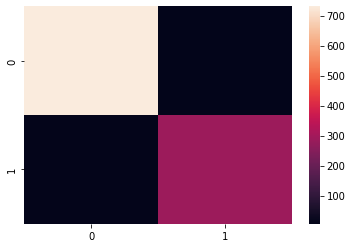

In [88]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred))

In [89]:
from sklearn.pipeline import Pipeline
clf = Pipeline(
[
    ("vectorizer",CountVectorizer()),
    ('nb',MultinomialNB())
    
])

In [90]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [91]:
confusion_matrix(y_test,clf.predict(X_test))

array([[731,   6],
       [ 10, 288]], dtype=int64)